In [1]:
# Install Kaggle API
!pip install -q kaggle

# Upload kaggle.json file from your local machine
from google.colab import files
files.upload()

# Create a directory for Kaggle configuration and move kaggle.json there
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Set permissions for kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset using Kaggle API
!kaggle datasets download -d nunenuh/pytorch-challange-flower-dataset

# Unzip the downloaded dataset
!unzip pytorch-challange-flower-dataset.zip -d /content/flower_dataset

# Remove the zip file
!rm pytorch-challange-flower-dataset.zip

# Remove the kaggle.json file
!rm kaggle.json

Streaming output truncated to the last 5000 lines.
  inflating: /content/flower_dataset/dataset/train/48/image_04686.jpg  
  inflating: /content/flower_dataset/dataset/train/48/image_04689.jpg  
  inflating: /content/flower_dataset/dataset/train/48/image_04692.jpg  
  inflating: /content/flower_dataset/dataset/train/48/image_04694.jpg  
  inflating: /content/flower_dataset/dataset/train/48/image_04695.jpg  
  inflating: /content/flower_dataset/dataset/train/49/image_06198.jpg  
  inflating: /content/flower_dataset/dataset/train/49/image_06199.jpg  
  inflating: /content/flower_dataset/dataset/train/49/image_06200.jpg  
  inflating: /content/flower_dataset/dataset/train/49/image_06201.jpg  
  inflating: /content/flower_dataset/dataset/train/49/image_06203.jpg  
  inflating: /content/flower_dataset/dataset/train/49/image_06204.jpg  
  inflating: /content/flower_dataset/dataset/train/49/image_06205.jpg  
  inflating: /content/flower_dataset/dataset/train/49/image_06206.jpg  
  inflating: 

In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.models as models
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder
from PIL import Image
from pathlib import Path
from PIL import Image
import PIL.ImageOps

Set Up Data Transforms

In [3]:
# Define data transforms
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

Load Data:

In [4]:
# Define paths
data_dir = '/content/flower_dataset/dataset'

# Load datasets
train_dataset = ImageFolder(root=os.path.join(data_dir, 'train'), transform=transform)
valid_dataset = ImageFolder(root=os.path.join(data_dir, 'valid'), transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=32, shuffle=True)

In [26]:
# Custom Dataset for Test Images
class TestDataset(torch.utils.data.Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = list(Path(root_dir).glob('*'))

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        image = Image.open(img_path).convert('RGB')
        if self.transform:
            image = self.transform(image)
        return image, img_path.name

In [27]:
# Initialize the test dataset and loader
test_dataset = TestDataset(root_dir=os.path.join(data_dir, 'test'), transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

## MODEL

## ResNET

In [7]:
# Define and initialize the CNN model
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(train_dataset.classes))  # Number of classes
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 173MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [8]:
!pip install -q torchviz
from torchviz import make_dot

# Generate a random input tensor
x = torch.randn(1, 3, 224, 224).to(device)

# Pass the input through the model to get the output
y = model(x)

# Create the visualization
visualization = make_dot(y, params=dict(model.named_parameters()))

# Display the visualization
visualization.render("resnet18_graph", format="png")


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 56.9 MB/s eta 0:00:00


'resnet18_graph.png'

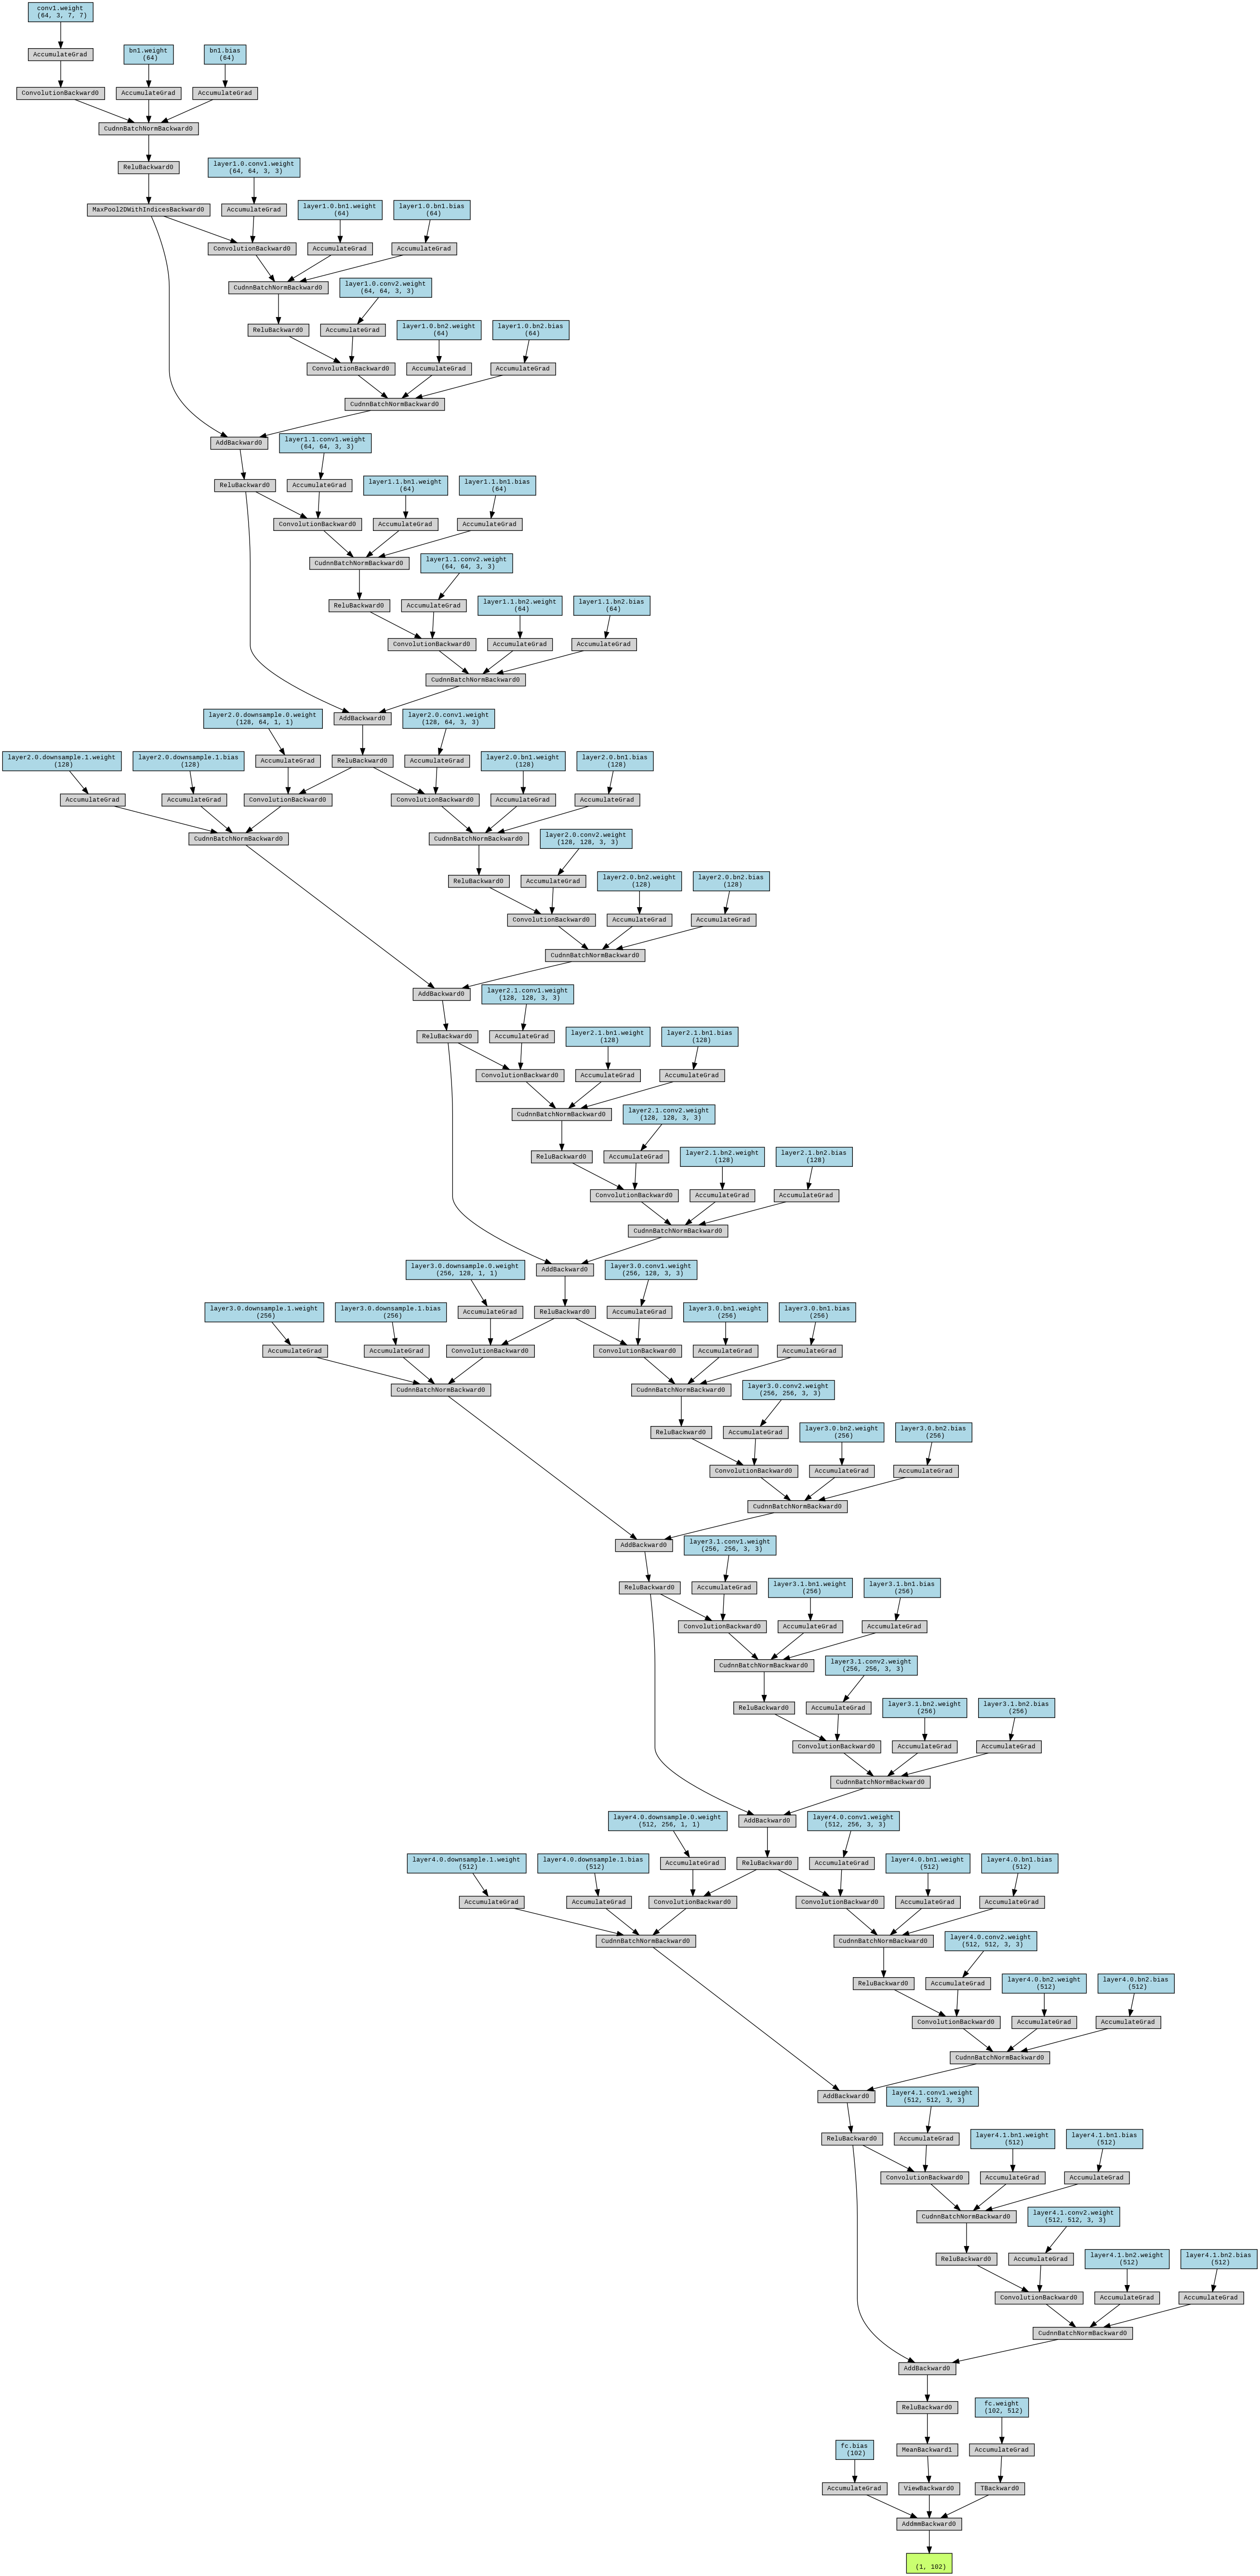

In [10]:
from IPython.display import Image
Image('resnet18_graph.png')


In [11]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10

# Training history
history = {'train_loss': [], 'valid_loss': [], 'train_acc': [], 'valid_acc': []}


In [12]:
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    running_corrects = 0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * inputs.size(0)
        _, preds = torch.max(outputs, 1)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_loader.dataset)
    epoch_acc = running_corrects.double() / len(train_loader.dataset)
    history['train_loss'].append(epoch_loss)
    history['train_acc'].append(epoch_acc.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}')

    model.eval()
    valid_loss = 0.0
    valid_corrects = 0

    with torch.no_grad():
        for inputs, labels in valid_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            valid_loss += loss.item() * inputs.size(0)
            _, preds = torch.max(outputs, 1)
            valid_corrects += torch.sum(preds == labels.data)

    valid_loss = valid_loss / len(valid_loader.dataset)
    valid_acc = valid_corrects.double() / len(valid_loader.dataset)
    history['valid_loss'].append(valid_loss)
    history['valid_acc'].append(valid_acc.item())
    print(f'Epoch {epoch+1}/{num_epochs}, Valid Loss: {valid_loss:.4f}, Valid Acc: {valid_acc:.4f}')

Epoch 1/10, Train Loss: 1.6137, Train Acc: 0.6103
Epoch 1/10, Valid Loss: 1.1572, Valid Acc: 0.6944
Epoch 2/10, Train Loss: 0.5167, Train Acc: 0.8578
Epoch 2/10, Valid Loss: 0.6998, Valid Acc: 0.7897
Epoch 3/10, Train Loss: 0.2417, Train Acc: 0.9309
Epoch 3/10, Valid Loss: 0.6675, Valid Acc: 0.8203
Epoch 4/10, Train Loss: 0.1979, Train Acc: 0.9437
Epoch 4/10, Valid Loss: 0.9606, Valid Acc: 0.7445
Epoch 5/10, Train Loss: 0.1846, Train Acc: 0.9504
Epoch 5/10, Valid Loss: 0.6037, Valid Acc: 0.8509
Epoch 6/10, Train Loss: 0.1470, Train Acc: 0.9592
Epoch 6/10, Valid Loss: 0.7259, Valid Acc: 0.8264
Epoch 7/10, Train Loss: 0.0972, Train Acc: 0.9705
Epoch 7/10, Valid Loss: 0.7770, Valid Acc: 0.7897
Epoch 8/10, Train Loss: 0.0919, Train Acc: 0.9716
Epoch 8/10, Valid Loss: 0.5211, Valid Acc: 0.8729
Epoch 9/10, Train Loss: 0.0783, Train Acc: 0.9786
Epoch 9/10, Valid Loss: 0.4392, Valid Acc: 0.8839
Epoch 10/10, Train Loss: 0.0973, Train Acc: 0.9727
Epoch 10/10, Valid Loss: 0.9544, Valid Acc: 0.757

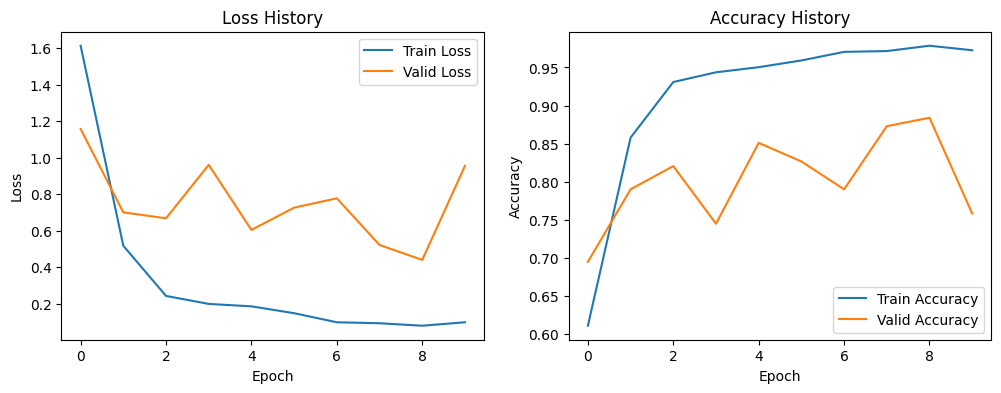

In [13]:
# Plot the training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['valid_loss'], label='Valid Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss History')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history['train_acc'], label='Train Accuracy')
plt.plot(history['valid_acc'], label='Valid Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy History')
plt.legend()

plt.show()

In [14]:
# Evaluate the model
model.eval()
corrects = 0
total = 0

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        total += labels.size(0)
        corrects += (preds == labels).sum().item()

accuracy = corrects / total
print(f'Validation Accuracy: {accuracy:.4f}')

Validation Accuracy: 0.7579


In [28]:
# Test the model
model.eval()
predictions = []
filenames = []

with torch.no_grad():
    for inputs, file_names in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)

        predictions.extend(preds.cpu().numpy())
        filenames.extend(file_names)

# Output the predictions along with the filenames
for filename, pred in zip(filenames, predictions):
    print(f'{filename}: {train_dataset.classes[pred]}')

image_06099.jpg: 64
image_07584.jpg: 95
image_05440.jpg: 54
image_07857.jpg: 85
image_03032.jpg: 38
image_03058.jpg: 92
image_08004.jpg: 102
image_02825.jpg: 56
image_06215.jpg: 49
image_06593.jpg: 25
image_06104.jpg: 64
image_04277.jpg: 18
image_04344.jpg: 36
image_03689.jpg: 53
image_01474.jpg: 51
image_01856.jpg: 78
image_06460.jpg: 33
image_03454.jpg: 23
image_07199.jpg: 6
image_00798.jpg: 81
image_03489.jpg: 30
image_01685.jpg: 82
image_02135.jpg: 75
image_06954.jpg: 62
image_00203.jpg: 77
image_04417.jpg: 26
image_04014.jpg: 30
image_02041.jpg: 80
image_01276.jpg: 74
image_02977.jpg: 61
image_00258.jpg: 73
image_03926.jpg: 11
image_06197.jpg: 19
image_06933.jpg: 62
image_06500.jpg: 26
image_00365.jpg: 73
image_01548.jpg: 94
image_03243.jpg: 65
image_02154.jpg: 75
image_03542.jpg: 30
image_08023.jpg: 102
image_06726.jpg: 79
image_02933.jpg: 60
image_04137.jpg: 29
image_01200.jpg: 74
image_07434.jpg: 94
image_07833.jpg: 85
image_03048.jpg: 92
image_01759.jpg: 90
image_03039.jpg: 92

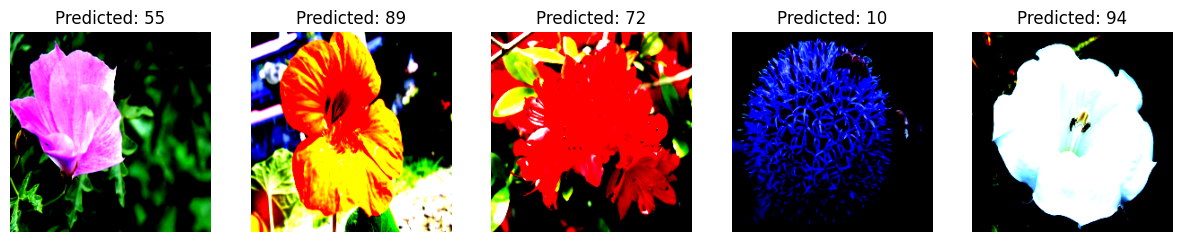

In [29]:
num_images_to_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    index = np.random.randint(0, len(test_dataset))
    image, filename = test_dataset[index]
    pred = predictions[index]

    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image.permute(1, 2, 0))  # Permute to (H, W, C) for display
    plt.title(f"Predicted: {train_dataset.classes[pred]}")
    plt.axis('off')

plt.show()


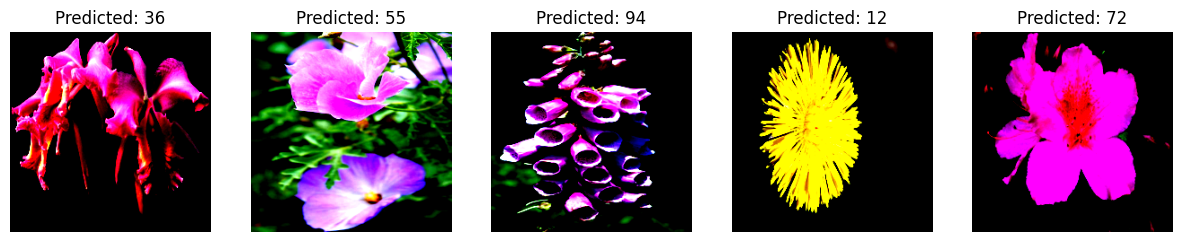

In [30]:
# Plot some test images with predictions
num_images_to_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    index = np.random.randint(0, len(test_dataset))
    image, filename = test_dataset[index]
    pred = predictions[index]

    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image.permute(1, 2, 0))  # Permute to (H, W, C) for display
    plt.title(f"Predicted: {train_dataset.classes[pred]}")
    plt.axis('off')

plt.show()


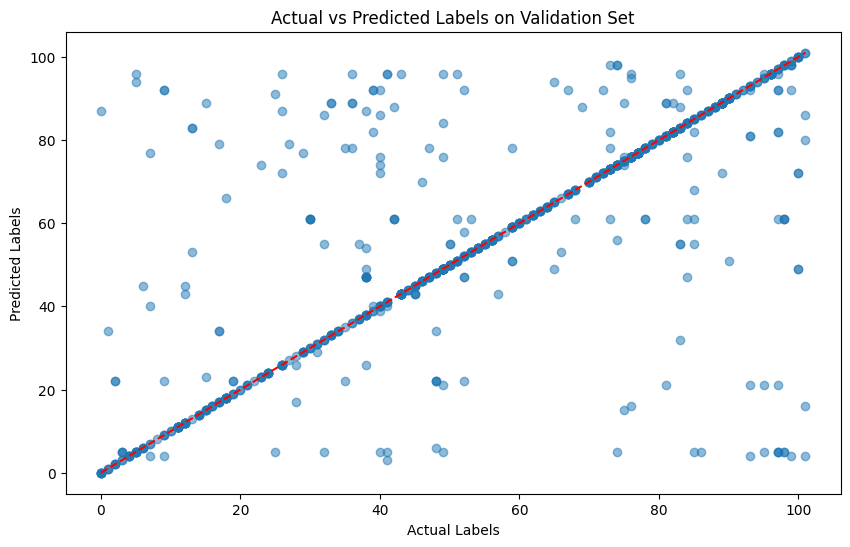

In [32]:
# Get predictions for the validation set
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(all_labels, all_preds, alpha=0.5)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Actual vs Predicted Labels on Validation Set')

# Add a diagonal line for reference
plt.plot([min(all_labels), max(all_labels)], [min(all_labels), max(all_labels)], color='red', linestyle='--')

plt.show()


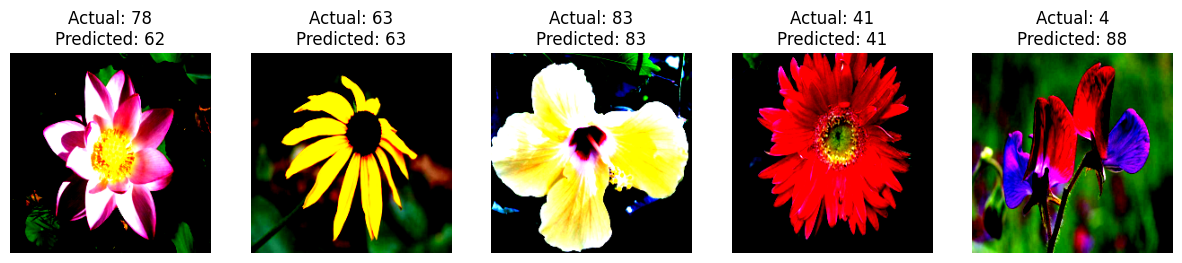

In [33]:
# Get predictions for the validation set with filenames
model.eval()
all_preds = []
all_labels = []
all_filenames = []

with torch.no_grad():
    for inputs, labels in valid_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())
        # Assuming your valid_loader returns filenames as well
        all_filenames.extend(inputs)

# Show images with actual vs predicted labels
num_images_to_show = 5
plt.figure(figsize=(15, 5))
for i in range(num_images_to_show):
    index = np.random.randint(0, len(all_labels))
    image = all_filenames[index]
    actual_label = all_labels[index]
    pred_label = all_preds[index]

    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(image.cpu().permute(1, 2, 0))  # Assuming images are tensors
    plt.title(f"Actual: {train_dataset.classes[actual_label]}\nPredicted: {train_dataset.classes[pred_label]}")
    plt.axis('off')

plt.show()
